<a href="https://colab.research.google.com/github/MaksymilianSzymczak/ML24/blob/main/Domowe_1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






Pierwsze 5 wierszy danych:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0

Wyjaśniona wariancja przez każdą składową: [0.34722276 0.33441835]


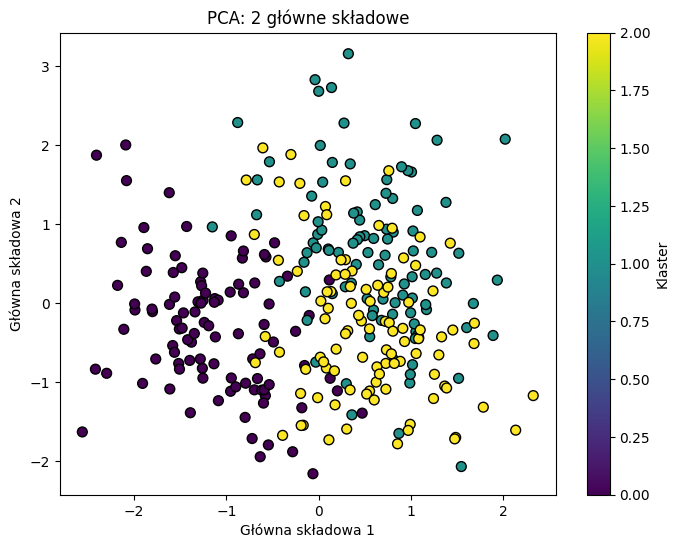

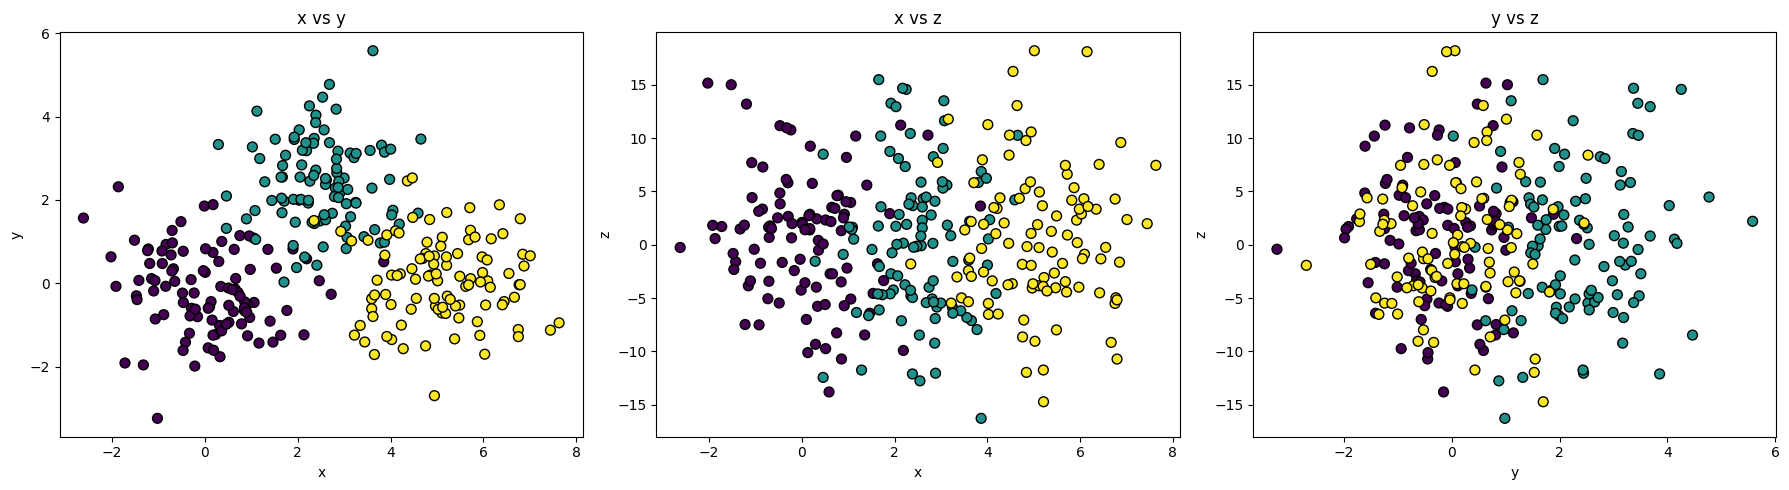

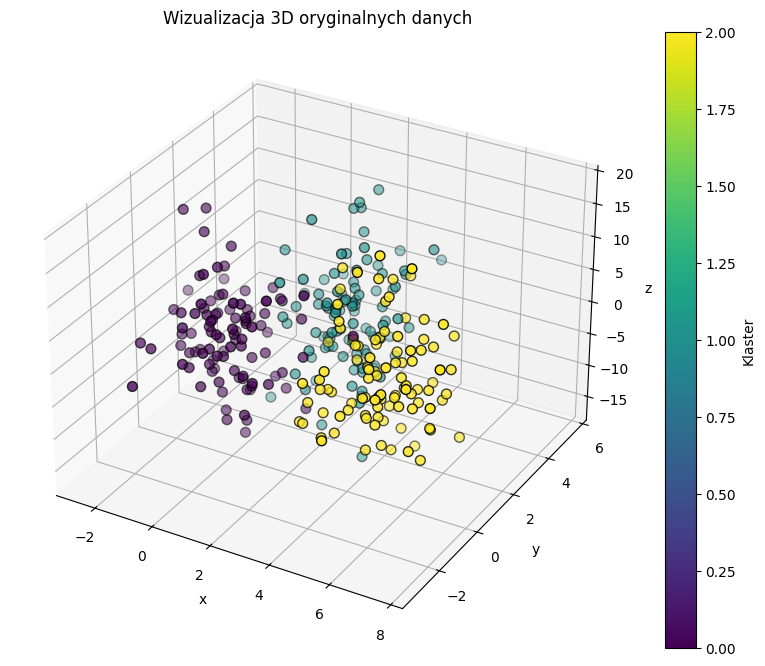


### Primary Question

Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.

Odpowiedź:
Na wykresie przedstawiającym PC1 w stosunku do PC2, dane nie są dobrze rozdzielone – grupy żółtych i zielonych punktów w sporym stopniu nakładają się na siebie. Spośród wygenerowanych wykresów 2D, jedynie wykres x vs y wykazuje wyraźny podział danych ze względu na przynależność do klas. Metoda PCA nie zapewniła dostatecznego rozdzielenia danych, ponieważ algorytm PCA dąży do znalezienia takiego kierunku obrotu przestrzeni, który maksymalizuje wariancję współrzędnych, nie uwzględniając przy tym zmiennej odpowiadającej za klasyfikację. Analiza wykresu 3D wyjaśnia dlaczego tak się stało. Z perspektywy kierunku maksymalizującego wariancję, chmury punktów zielonych i żółtych nakładają się na siebie, podczas gdy chmura punktów fioletowych jest obok.

### Secondary Question

Why is standardization necessary before applying PCA?

Reflec

In [1]:
# Instalacja niezbędnych bibliotek
!pip install pandas numpy matplotlib scikit-learn

# Import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Do wizualizacji 3D

# Pobranie danych z URL
url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv"
data = pd.read_csv(url)

# Wyświetlenie pierwszych kilku wierszy danych
print("Pierwsze 5 wierszy danych:")
print(data.head())

# Wyodrębnienie cech (X) i etykiet (y)
X = data.iloc[:, :-1]  # Wszystkie kolumny oprócz ostatniej
y = data.iloc[:, -1]   # Ostatnia kolumna to etykiety klastrów

# Zmiana nazw kolumn na x, y, z
X.columns = ['x', 'y', 'z']

# Standaryzacja danych
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Redukcja do 2 składowych głównych za pomocą PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Wyświetlenie wyjaśnionej wariancji
print("\nWyjaśniona wariancja przez każdą składową:", pca.explained_variance_ratio_)

# Wizualizacja danych po PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA: 2 główne składowe')
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.colorbar(label='Klaster')
plt.show()

# Wizualizacja oryginalnych cech
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# x vs y
axes[0].scatter(X['x'], X['y'], c=y, cmap='viridis', edgecolor='k', s=50)
axes[0].set_title('x vs y')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

# x vs z
axes[1].scatter(X['x'], X['z'], c=y, cmap='viridis', edgecolor='k', s=50)
axes[1].set_title('x vs z')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

# y vs z
axes[2].scatter(X['y'], X['z'], c=y, cmap='viridis', edgecolor='k', s=50)
axes[2].set_title('y vs z')
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')

plt.tight_layout()
plt.show()

# Wizualizacja 3D oryginalnych danych
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['x'], X['y'], X['z'], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title('Wizualizacja 3D oryginalnych danych')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.colorbar(scatter, label='Klaster')
plt.show()

print("""
### Primary Question

Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.

Odpowiedź:
Na wykresie przedstawiającym PC1 w stosunku do PC2, dane nie są dobrze rozdzielone – grupy żółtych i zielonych punktów w sporym stopniu nakładają się na siebie. Spośród wygenerowanych wykresów 2D, jedynie wykres x vs y wykazuje wyraźny podział danych ze względu na przynależność do klas. Metoda PCA nie zapewniła dostatecznego rozdzielenia danych, ponieważ algorytm PCA dąży do znalezienia takiego kierunku obrotu przestrzeni, który maksymalizuje wariancję współrzędnych, nie uwzględniając przy tym zmiennej odpowiadającej za klasyfikację. Analiza wykresu 3D wyjaśnia dlaczego tak się stało. Z perspektywy kierunku maksymalizującego wariancję, chmury punktów zielonych i żółtych nakładają się na siebie, podczas gdy chmura punktów fioletowych jest obok.

### Secondary Question

Why is standardization necessary before applying PCA?

Reflect on how differences in scale among features can impact the principal component directions.

Odpowiedź:
Standaryzacja jest konieczna, ponieważ PCA jest wrażliwe na skalę danych. Jeśli cechy mają różne jednostki lub zakresy wartości, cechy o większej skali będą dominować w obliczeniach wariancji, co może zniekształcić kierunki głównych składowych. Standaryzacja zapewnia, że każda cecha ma równy wpływ na analizę.
""")